# Video Game Sales - Code & Analysis
#### by Kevin Nguyen
<b>Created:</b> April 27, 2023<br>
<b>Last Update:</b> October 6, 2023

***
This project was originally completed as part of the final project for the class "MTH 412: Intro. to Statistical Inference" at the University at Buffalo. The original project, including the code, write-up, and presentation can be found in the ```class_original``` directory.

The goal is to now expand upon the original project in two ways: by refining the techniques and code and by adding additional methods of analysis and prediction.
***

## Exploratory Data Analysis (EDA)

Section intro
***
### Dataset Description
The dataset is taken from Ulrik Thyge Pedersen's "Video Games Sales," uploaded on [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales/data). It contains the following 11 columns:

* rank: The rank of a game based on its number of global_sales
* name: The name of a game
* platform: The platform a game was released on and does not consider multiple platforms - each platform has their own entry.
* year: The year a game was released
* genre: The main genre of a game
* publisher: The game's publisher
* na_sales: The number of sales in North America (in millions)
* eu_sales: The number of sales in Europe (in millions)
* jp_sales: The number of sales in Japan (in millions)
* other_sales: The number of sales outside of North America, Europe, and Japan (in millions)
* global_sales: The total number of sales (in millions)

There are some aspects about the dataset that are noteworthy to mention. Firstly, because the dataset focuses on the number of sales, this implies that games that are "free-to-play" are completely excluded from the dataset. Secondly, games that were released on multiple platforms are included more than once (one entry for each platform they were released on). 

***
### Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load & Process Data

In [2]:
games_data = pd.read_csv("video_games_sales.csv")

# reorder columns of csv, so index does not precede ranking
cols = ['name', 'platform', 'year', 'genre', 'publisher',
        'rank', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
games_data = games_data[cols]

In [3]:
games_data.head(10)

,name,platform,year,genre,publisher,rank,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,1,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,2,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,4,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,5,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,6,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,7,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,8,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,9,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,10,26.93,0.63,0.28,0.47,28.31


In [4]:
# summary of each numeric column
games_data.describe()

,year,rank,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


***
#### Data Cleaning
A quick look at the <b>count</b> row in the summary table shows us that there are missing values for the <b>year</b> column. Our next step will be to check the data set for any missing values and to remove the rows that are missing values.

In [5]:
# check for missing values
games_data.isnull().sum()

# missing years are 2018, 2019; 2020 and 2017 have negligible entries (single digit number)

name              0
platform          0
year            271
genre             0
publisher        58
rank              0
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

***
We found that there are missing values for 271 <b>year</b> entries and 58 missing values for <b>publisher</b> entries.

Upon further inspection, we can find that the years 2018 and 2019 are missing completely from the data, and 2020 and 2017 have a negligible number of entries. We are able to safely and confidently remove the entries from 2020 and 2017 from the dataset due to their negligibility. As mentioned before, we will also drop rows that are missing a <b>year</b> entry.

As for the missing values in the <b>publisher</b> column, we can fill them in with the value of "Unknown" instead of removing the entries.

In [6]:
games_data.loc[games_data["year"] == 2020]

,name,platform,year,genre,publisher,rank,na_sales,eu_sales,jp_sales,other_sales,global_sales
5957,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,5959,0.27,0.0,0.0,0.02,0.29


In [7]:
games_data.drop([14390, 16241, 16438, 5957], axis = 0, inplace = True) # drops the entries from 2020 and 2017
games_data["publisher"].fillna(value = "Unknown", inplace = True) # fills in missing publisher values with 'Unknown'
games_data.dropna(inplace = True) # drops remaining missing values from dataset
games_data.reset_index(inplace = True, drop = True)

In [8]:
trunc_data = games_data.loc[(games_data["global_sales"] > 0.01)]

In [9]:
# numeric summary after changes made
trunc_data.describe()

,year,rank,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000,15720.000000
mean,2006.298982,7984.755534,0.275555,0.153152,0.081497,0.050190,0.560686
std,5.852258,4614.625014,0.835647,0.517682,0.317173,0.193275,1.592144
min,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,2003.000000,3984.750000,0.000000,0.000000,0.000000,0.000000,0.070000
50%,2007.000000,7986.500000,0.080000,0.030000,0.000000,0.010000,0.190000
75%,2010.000000,11977.500000,0.250000,0.120000,0.040000,0.040000,0.500000
max,2016.000000,15982.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Visualizations
In this section, we will start to visualize some of the main aspects of this dataset. We will begin by visualizing the dataset in its entirety, then move on to regional visualizations.

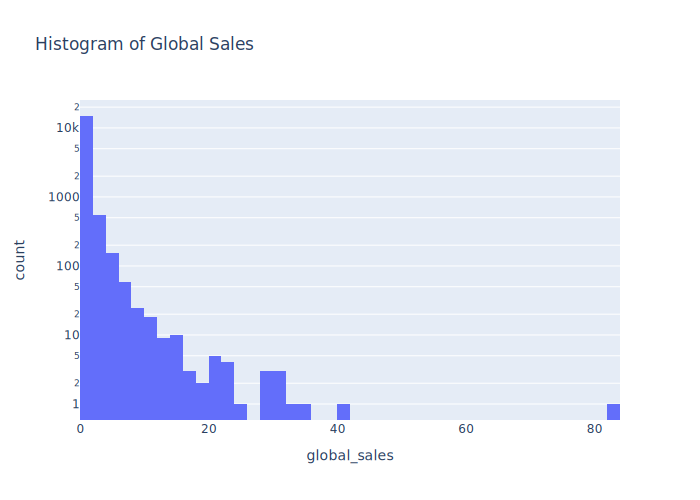

In [30]:
# hist global sales
fig = px.histogram(trunc_data, x = "global_sales", nbins=50 ,log_y=True, title = "Histogram of Global Sales")
fig.show("svg")

From this histogram, we can observe that a majority of the games in this data set had between 0 and 10 million sales, with only a few games having more than 20 million sales. There are two noteworthy points: one game that had between 40 and 42 million sales and one game that had more than 80 million sales.

We already saw which games these points belonged to: the game with the largest number of sales is Wii Sports on the Wii and the game with the second largest number of sales is Super Mario Bros on the NES, both published by Nintendo.
***

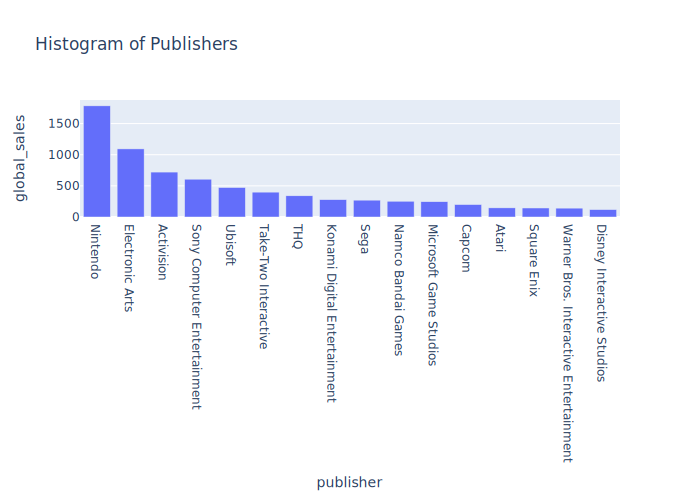

In [29]:
# publishers by global sales
top_publishers = trunc_data.groupby("publisher").sum().sort_values(by = "global_sales", ascending = False)[["na_sales", "eu_sales", "jp_sales", "other_sales", "global_sales"]].reset_index()
actual_top_pub = top_publishers.loc[top_publishers["global_sales"] >= 100]
fig = px.bar(actual_top_pub, x = "publisher", y = "global_sales", title = "Histogram of Publishers")
fig.show("svg")

Here, Nintendo is by far the most successful publisher, in terms of the number of global sales. This begs the question: is this the result of the number of games they have put out compared to other publishers? Or could it be that some of their games are immensely popular.

We will explore this question later on, but a preliminary look at the data suggests that Nintendo just releases popular games. This is supported by the fact that the top 10 games, in terms of global sales, are all published by Nintendo.
***

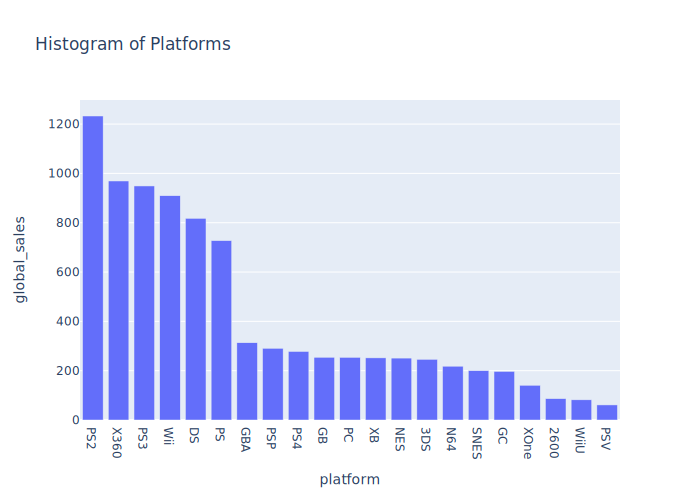

In [28]:
# same for top platforms
top_platforms = trunc_data.groupby("platform").sum().sort_values(by = "global_sales", ascending = False)[["na_sales", "eu_sales", "jp_sales", "other_sales", "global_sales"]].reset_index()
fig = px.bar(top_platforms.loc[top_platforms["global_sales"] > 50], x = "platform", y = "global_sales", title = "Histogram of Platforms")
fig.show("svg")

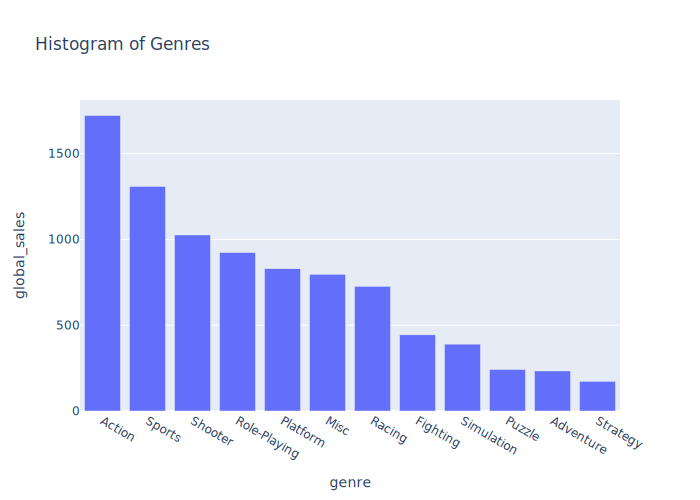

In [31]:
# same for top genre
top_genres = trunc_data.groupby("genre").sum().sort_values(by = "global_sales", ascending = False)[["na_sales", "eu_sales", "jp_sales", "other_sales", "global_sales"]].reset_index()
fig = px.bar(top_genres, x = "genre", y = "global_sales", title = "Histogram of Genres")
fig.show("svg")

In [15]:
def aggregate_regional_summary(feature):
    """
    Gets regional sum and average, grouped by << feature >> (genre, publisher, year).
    
    Parameters:
    feature <str>: category of interest in dataframe
    
    Returns:
    agg_sales <dataframe>: dataframe of regional sum and average, grouped by feature
    """
    
    # get na_sales
    na_sales = trunc_data.groupby(feature)["na_sales"].agg(["sum", "mean"]).reset_index()
    na_sales.columns = [feature, "sum_na", "avg_na"]
    
    # get eu_sales
    eu_sales = trunc_data.groupby(feature)["eu_sales"].agg(["sum", "mean"]).reset_index()
    eu_sales.columns = [feature, "sum_eu", "avg_eu"]
    
    # get jp_sales
    jp_sales = trunc_data.groupby(feature)["jp_sales"].agg(["sum", "mean"]).reset_index()
    jp_sales.columns = [feature, "sum_jp", "avg_jp"]

    # get other_sales
    other_sales = trunc_data.groupby(feature)["other_sales"].agg(["sum", "mean"]).reset_index()
    other_sales.columns = [feature, "sum_other", "avg_other"]

    # get global_sales
    global_sales = trunc_data.groupby(feature)["global_sales"].agg(["sum", "mean"]).reset_index()
    global_sales.columns = [feature, "sum_global", "avg_global"]
    
    # merge all sales tables on the category of interest
    agg_sales = na_sales.merge(eu_sales, on = feature).merge(jp_sales, on = feature).merge(other_sales, on = feature).merge(global_sales, on = feature)
    
    return agg_sales

In [16]:
# genre summary for each sales region
agg_genre_sales = aggregate_regional_summary("genre")
agg_genre_sales

,genre,sum_na,avg_na,sum_eu,avg_eu,sum_jp,avg_jp,sum_other,avg_other,sum_global,avg_global
0,Action,861.59,0.273694,516.18,0.163971,158.10,0.050222,184.92,0.058742,1721.83,0.546960
1,Adventure,101.94,0.090292,63.67,0.056395,50.77,0.044969,16.70,0.014792,233.33,0.206670
2,Fighting,220.67,0.272096,99.98,0.123280,86.98,0.107250,36.19,0.044624,443.80,0.547226
3,Misc,402.31,0.243824,213.72,0.129527,106.32,0.064436,74.02,0.044861,797.02,0.483042
4,Platform,445.93,0.517320,200.63,0.232749,130.61,0.151520,51.51,0.059756,829.01,0.961729
5,Puzzle,121.80,0.227239,50.44,0.094104,56.63,0.105653,12.47,0.023265,241.87,0.451250
6,Racing,356.73,0.300784,236.16,0.199123,56.57,0.047698,76.68,0.064654,726.37,0.612454
7,Role-Playing,326.47,0.228141,187.49,0.131020,349.99,0.244577,59.38,0.041495,923.42,0.645297
8,Shooter,575.03,0.458923,310.34,0.247678,38.11,0.030415,101.90,0.081325,1025.91,0.818763
9,Simulation,181.47,0.219964,113.08,0.137067,63.44,0.076897,31.34,0.037988,389.62,0.472267


In [17]:
# create pie chart
fig = px.pie(agg_genre_sales, values = "sum_global", names = "genre", color_discrete_sequence = px.colors.sequential.thermal,
             title = "Total Sales Globally by Genre")
fig.update_traces(textposition = "inside", textinfo = "label+percent")

In [18]:
# publisher summary by region
agg_pub_sales = aggregate_regional_summary("publisher")

# create pie chart
fig = px.pie(agg_pub_sales, values = "sum_global", names = "publisher", color_discrete_sequence = px.colors.sequential.thermal,
             title = "Total Sales Globally by Publisher")
fig.update_traces(textposition = "inside", textinfo = "label+percent")

### Topics to explore:
Most profitable genre (measured by genre)

top genre by publishers

linear regression to predict number of games per year

In [19]:
test = trunc_data.groupby(["genre", "publisher"])["global_sales"].agg(["sum", "mean"]).reset_index()
test.sort_values(by = "sum", ascending = False).loc[test["sum"] >= 50]

,genre,publisher,sum,mean
1531,Sports,Electronic Arts,468.66,0.850563
769,Platform,Nintendo,426.17,3.874273
1196,Shooter,Activision,295.38,1.930588
1144,Role-Playing,Nintendo,284.57,2.710190
1584,Sports,Nintendo,218.01,3.963818
189,Action,Take-Two Interactive,211.07,2.294239
628,Misc,Nintendo,180.65,1.843367
1229,Shooter,Electronic Arts,158.25,1.146739
983,Racing,Nintendo,151.30,4.089189
946,Racing,Electronic Arts,145.77,0.916792


## Statistical Analysis & Inference
***

### Hypothesis Testing

In [20]:
from scipy.stats import permutation_test, ttest_ind

## Test #1

Test if differences in means between top two (by sum) genres are statistically significant.

Let $\mu_A$ be the ```avg_global``` of the Action genre

Let $\mu_B$ be the ```avg_global``` of the Sports genre 

H0: $\mu_A - \mu_B = 0$

HA: $\mu_A < \mu_B$

In [21]:
agg_genre_sales

,genre,sum_na,avg_na,sum_eu,avg_eu,sum_jp,avg_jp,sum_other,avg_other,sum_global,avg_global
0,Action,861.59,0.273694,516.18,0.163971,158.10,0.050222,184.92,0.058742,1721.83,0.546960
1,Adventure,101.94,0.090292,63.67,0.056395,50.77,0.044969,16.70,0.014792,233.33,0.206670
2,Fighting,220.67,0.272096,99.98,0.123280,86.98,0.107250,36.19,0.044624,443.80,0.547226
3,Misc,402.31,0.243824,213.72,0.129527,106.32,0.064436,74.02,0.044861,797.02,0.483042
4,Platform,445.93,0.517320,200.63,0.232749,130.61,0.151520,51.51,0.059756,829.01,0.961729
5,Puzzle,121.80,0.227239,50.44,0.094104,56.63,0.105653,12.47,0.023265,241.87,0.451250
6,Racing,356.73,0.300784,236.16,0.199123,56.57,0.047698,76.68,0.064654,726.37,0.612454
7,Role-Playing,326.47,0.228141,187.49,0.131020,349.99,0.244577,59.38,0.041495,923.42,0.645297
8,Shooter,575.03,0.458923,310.34,0.247678,38.11,0.030415,101.90,0.081325,1025.91,0.818763
9,Simulation,181.47,0.219964,113.08,0.137067,63.44,0.076897,31.34,0.037988,389.62,0.472267


In [22]:
action_games = trunc_data.loc[trunc_data["genre"] == "Action"]["global_sales"]
sports_games = trunc_data.loc[trunc_data["genre"] == "Sports"]["global_sales"]

In [34]:
len(action_games), len(sports_games)

(3148, 2255)

In [44]:
action_games.describe()

count    3148.000000
mean        0.546960
std         1.180286
min         0.020000
25%         0.080000
50%         0.205000
75%         0.510000
max        21.400000
Name: global_sales, dtype: float64

In [43]:
t_stat = (action_games.describe()["mean"] - sports_games.describe()["mean"]) / np.sqrt((action_games.describe()["std"]**2 / action_games.describe()["count"])+(sports_games.describe()["std"]**2 / sports_games.describe()["count"]))

t_stat

-0.6755367603317097

In [26]:
# compute difference in means
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [45]:
# t - test
ttest_ind(action_games, sports_games, alternative = "less", equal_var = False)

Ttest_indResult(statistic=-0.6755367603317097, pvalue=0.24969146392880254)

In [28]:
# resample
permutation_test((action_games, sports_games), statistic = statistic, vectorized = True, alternative = "less")

PermutationTestResult(statistic=-0.03341696554599827, pvalue=0.2478, null_distribution=array([-0.061822  , -0.02429874,  0.0132702 , ..., -0.07310943,
       -0.04907322,  0.04949194]))

## Test #2

Let $\mu_0$ be the mean of Nintendo's platformer genre and let $\mu_1$ be the mean of Nintendo's RPG platform

H0: $\mu_0 - \mu_1$ = 0

HA: $\mu_0 > \mu_1$

In [29]:
nint_plat = trunc_data.loc[(trunc_data["publisher"] == "Nintendo") & (trunc_data["genre"] == "Platform")]["global_sales"]
nint_rpg = trunc_data.loc[(trunc_data["publisher"] == "Nintendo") & (trunc_data["genre"] == "Role-Playing")]["global_sales"]

1        40.24
6        30.01
8        28.62
18       20.61
21       18.14
         ...  
7168      0.22
8270      0.17
10580     0.10
11107     0.08
11576     0.07
Name: global_sales, Length: 110, dtype: float64

In [30]:
nint_plat
nint_rpg

4        31.37
12       23.10
20       18.36
25       15.85
26       15.32
         ...  
10942     0.09
11697     0.07
13729     0.04
14148     0.03
14210     0.03
Name: global_sales, Length: 105, dtype: float64

In [47]:
t_stat = (nint_plat.describe()["mean"] - nint_rpg.describe()["mean"]) / np.sqrt((nint_plat.describe()["std"]**2 / nint_plat.describe()["count"])+(nint_rpg.describe()["std"]**2 / nint_rpg.describe()["count"]))

t_stat

1.505311470361271

In [46]:
# t - test
ttest_ind(nint_plat, nint_rpg, alternative = "greater", equal_var = False)

Ttest_indResult(statistic=1.5053114703612713, pvalue=0.06688225533125643)

In [32]:
# permutation test
permutation_test((nint_plat, nint_rpg), statistic = statistic, vectorized = True, alternative = "greater")

PermutationTestResult(statistic=1.1640822510822524, pvalue=0.0655, null_distribution=array([-0.41798268,  0.86084848,  0.89119048, ...,  0.04794372,
       -0.93658874, -3.19027273]))

### Linear Regression

In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
yearly_sales = trunc_data.groupby(["year", "genre"]).sum().reset_index() # sales by year and genre
yearly_action_sales = yearly_sales.loc[yearly_sales["genre"] == "Action"].drop(columns = ["genre", "rank"]) # yearly action sales
yearly_action_sales.index = yearly_action_sales["year"] # shift year to be index of df

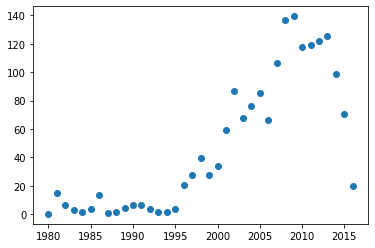

In [9]:
# scatter plot of global action game sales vs year
plt.scatter(x = yearly_action_sales["global_sales"].index, y = yearly_action_sales["global_sales"].values)

In [10]:
# linear regression model
lin_reg = LinearRegression()
years = np.array(yearly_action_sales["global_sales"].index - 1980).reshape(-1, 1)
sales = np.array(yearly_action_sales["global_sales"].values)

# fit model to data
lin_reg.fit(years, sales)

LinearRegression()

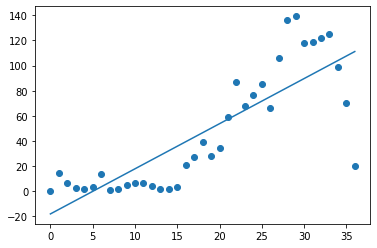

In [56]:
# plot line of best fit on top of scatter data
plt.plot(years, lin_reg.predict(years))
plt.scatter(years, sales)

In [58]:
# correlation coefficient and coefficient of determination
r_sq = lin_reg.score(years, sales)
r = np.sqrt(r_sq)
r, r_sq

(0.8178311186710656, 0.6688477386667666)

In [290]:
# slope and intercept
print(f"b0 = {lin_reg.intercept_}\nb1 = {lin_reg.coef_[0]}")

b0 = -18.12574679943097
b1 = 3.5923162636320507


In [12]:
# implement a cubic fit
np.polyfit(years.reshape(-1,), sales, deg = 3)

array([-2.03879606e-02,  1.12811360e+00, -1.30231436e+01,  3.12496471e+01])

In [11]:
# cubic fit function
def f(x):
    # get coefficients of x. order goes from highest degree to lowest (x^3 -> constant)
    coeffs = np.polyfit(years.reshape(-1,), sales, deg = 3)
    return coeffs[0] * x**3 + coeffs[1] * x**2 + coeffs[2] * x + coeffs[3]

In [71]:
X = np.linspace(0,36,100) # x values (years since 1980)
predicted_y = [f(x) for x in X] # predicted y values
plt.plot(X, predicted_y) # plot predicted curve
plt.scatter(years, sales) # scatter plot of actual data

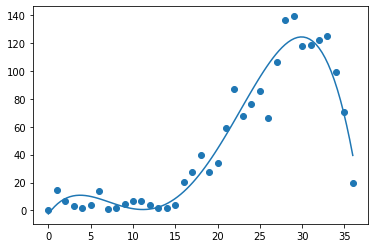

In [320]:
# compute residuals of fit
residuals = [sales[k] - predicted_y[k] for k in range(len(predicted_y))]
residuals

[-30.90964711675214,
 -4.494229127913126,
 -3.0327105706051185,
 1.0772363187535174,
 5.947939303744414,
 11.731726147949217,
 24.42092461494953,
 12.747862468327014,
 12.924867471663294,
 14.084267388539988,
 12.94838998253876,
 9.399563017241205,
 1.6401142562289888,
 -5.997628536916251,
 -12.541337598612948,
 -17.348685165279395,
 -7.587343473333949,
 -8.134984759195103,
 -3.999281259281055,
 -23.457905210010257,
 -24.888528847801055,
 -7.0788244090719346,
 13.093535869758895,
 -12.549120247726947,
 -10.384464997947816,
 -6.5201706173221226,
 -30.38390934226838,
 5.696646590795254,
 32.84382494545038,
 34.21995348527865,
 12.24735997386135,
 14.648372174780704,
 20.3053178516177,
 27.840524767954676,
 7.726320687372748,
 -12.72496662654639,
 -53.51100941022078]

In [321]:
# compute squared error (SE)
SE = 0
for r in residuals:
    SE += r**2
print(f"SE is {SE}")

# compute root mean squared error
RMSE = np.sqrt(SE / len(y_vals))
print(f"RMSE is {RMSE}")

SE is 12717.428903923963
RMSE is 18.53953329241725


In [77]:
# do same as above to compute residuals for linear fit
lin_fit = lin_reg.predict(years)
residuals_lin = [sales[k] - lin_fit[k] for k in range(len(y_vals))]
residuals_lin

[18.46574679943097,
 29.37343053579892,
 17.461114272166867,
 10.208798008534817,
 5.6064817449027675,
 3.684165481270718,
 10.311849217638667,
 -5.900467045993385,
 -8.862783309625435,
 -9.565099573257484,
 -11.407415836889534,
 -14.629732100521585,
 -21.152048364153643,
 -26.764364627785692,
 -30.61668089141774,
 -32.18899715504979,
 -18.771313418681835,
 -15.363629682313888,
 -7.095945945945935,
 -22.36826220957801,
 -19.68057847321002,
 2.057105263157915,
 25.844788999525775,
 3.3824727358937707,
 8.170156472261723,
 13.977840208629743,
 -8.74447605500238,
 27.55320768136562,
 53.87089141773359,
 53.24857515410166,
 27.986258890469415,
 25.683942626837393,
 25.10162636320517,
 24.73931009957326,
 -5.053006164058701,
 -37.08532242769094,
 -91.47763869132285]

In [79]:
# lin fit SE and RMSE
# squared error (SE)
SE_lin = 0
for r in residuals_lin:
    SE_lin += r**2
print(f"SE is {SE_lin}")

# root mean squared error
RMSE_lin = np.sqrt(SE_lin / len(y_vals))
print(f"RMSE is {RMSE_lin}")

SE is 26949.838461996216
RMSE is 26.988405148996563
